In [ ]:
from src.autoencoders.vae import VariationalAutoEncoder
from src.utils.utils import get_training_and_validation_sets_gray_scale, get_test_set_gray_scale, loss_function, save_latent_vectors

In [2]:
X_train, Y_train, cX_train, X_val, Y_val, cX_val = get_training_and_validation_sets_gray_scale()
X_test, Y_test, cX_test = get_test_set_gray_scale()

In [3]:
vae = VariationalAutoEncoder(
        input_dim=[1, 64, 64],
        latent_dim=1280,
        n_filters=[4, 4],
        kernel_size=[32, 16],
        stride=[2, 2],
        padding=['same', 'same'],
        hidden_dims=[2560],
        activation='relu',
        learning_rate=0.001,
        dropout=0.4,
        alpha=0.3, # LeakyReLU alpha
        loss_function=loss_function,
        patience=10,
        metrics=['mse', 'mae']
)

In [4]:
vae.train(X_train, X_val, epochs=500, batch_size=128)

Epoch 1/500
34/34 [==============================] - 138s 4s/step - loss: 0.3570 - mse: 0.1132 - mae: 0.3201 - val_loss: 0.3352 - val_mse: 0.0997 - val_mae: 0.3007
Epoch 2/500
34/34 [==============================] - 119s 4s/step - loss: 0.3143 - mse: 0.0878 - mae: 0.2825 - val_loss: 0.2926 - val_mse: 0.0756 - val_mae: 0.2623
Epoch 3/500
34/34 [==============================] - 124s 4s/step - loss: 0.2709 - mse: 0.0651 - mae: 0.2431 - val_loss: 0.2474 - val_mse: 0.0543 - val_mae: 0.2217
Epoch 4/500
34/34 [==============================] - 142s 4s/step - loss: 0.2246 - mse: 0.0452 - mae: 0.2015 - val_loss: 0.2013 - val_mse: 0.0365 - val_mae: 0.1800
Epoch 5/500
34/34 [==============================] - 94s 3s/step - loss: 0.1785 - mse: 0.0294 - mae: 0.1596 - val_loss: 0.1556 - val_mse: 0.0232 - val_mae: 0.1390
Epoch 6/500
34/34 [==============================] - 93s 3s/step - loss: 0.1344 - mse: 0.0181 - mae: 0.1197 - val_loss: 0.1122 - val_mse: 0.0138 - val_mae: 0.0999
Epoch 7/500
34/34 

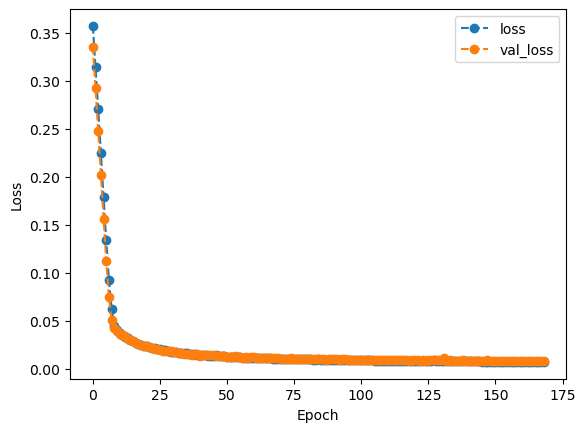

In [5]:
vae.visualize_loss()

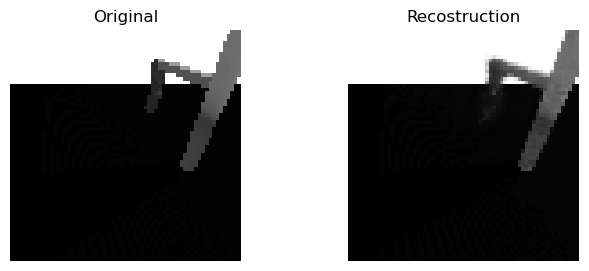

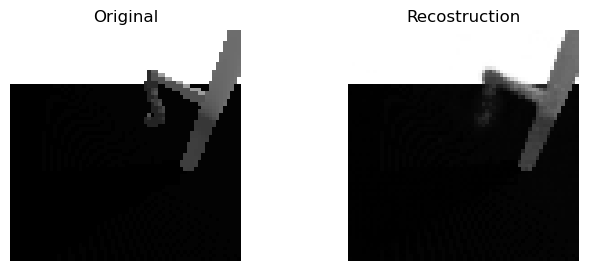

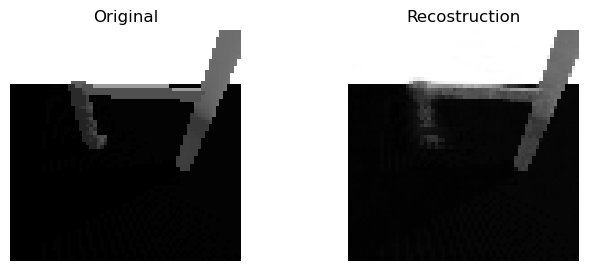

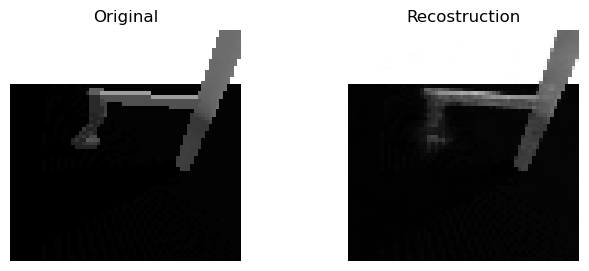

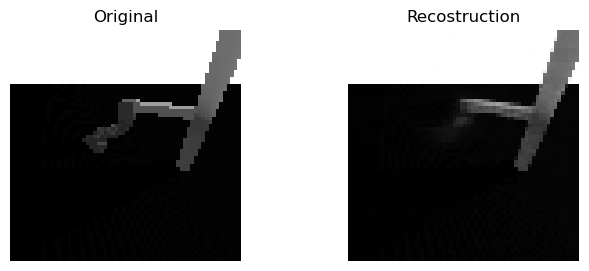

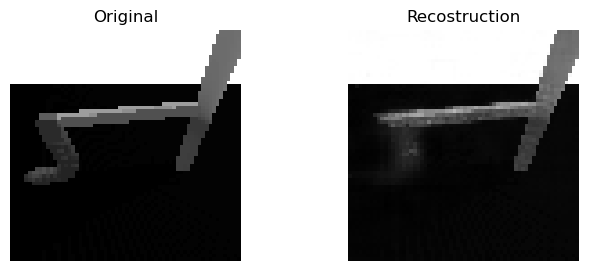

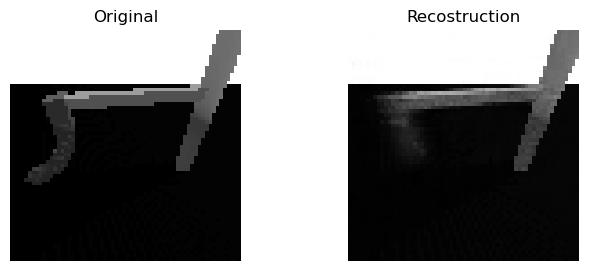

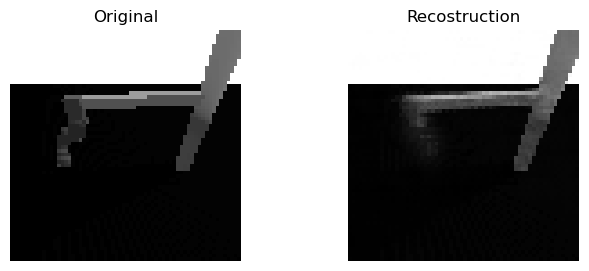

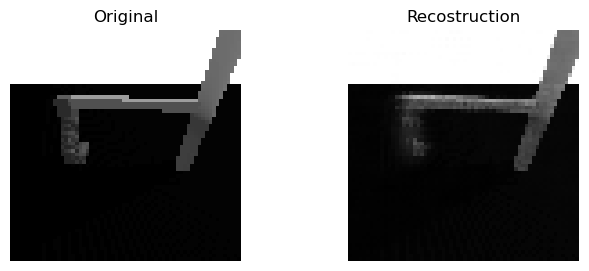

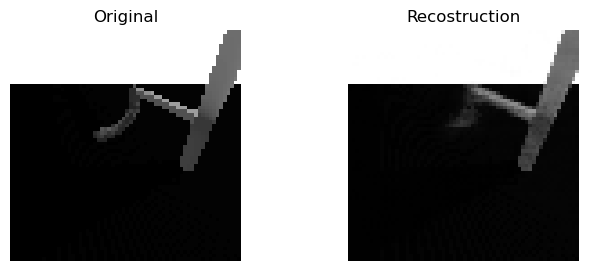

In [6]:
for i in range(10):
    vae.visualize_recostruction(X_train[36+i*47])

In [7]:
X_train_z = vae.compute_latent_vector(X_train)
X_val_z = vae.compute_latent_vector(X_val)
X_test_z = vae.compute_latent_vector(X_test)

69/69 [==============================] - 4s 59ms/step


In [8]:
save_latent_vectors(X_train_z, None, 'predictions/z_vae_gray_scale_train.pkl')
save_latent_vectors(X_val_z, None, 'predictions/z_vae_gray_scale_val.pkl')
save_latent_vectors(X_test_z, None, 'predictions/z_vae_gray_scale_test.pkl')

In [ ]:
Y_train_z = vae.compute_latent_vector(Y_train)
Y_val_z = vae.compute_latent_vector(Y_val)
Y_test_z = vae.compute_latent_vector(Y_test)

save_latent_vectors(Y_train_z, None, 'predictions/z_vae_gray_scale_train_labels.pkl')
save_latent_vectors(Y_val_z, None, 'predictions/z_vae_gray_scale_val_labels.pkl')
save_latent_vectors(Y_test_z, None, 'predictions/z_vae_gray_scale_test_labels.pkl')

In [11]:
# save history in a file
import pickle
with open('predictions/history_vae_gray_scale.pkl', 'wb') as file_pi:
    pickle.dump(vae.ae.history, file_pi)

In [13]:
vae.save_path = 'vae_gray_scale'
vae.save()

INFO:tensorflow:Assets written to: saved_models/vae_gray_scale\assets


INFO:tensorflow:Assets written to: saved_models/vae_gray_scale\assets
